K-Means Clustering
===

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline

In [2]:
#Plot the clustering
def plot_clusters(labels, clusters, X,i):
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
        plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=0.8)
    plt.title('Clustering: Iteration %d'%(i))  

Generate Data
---

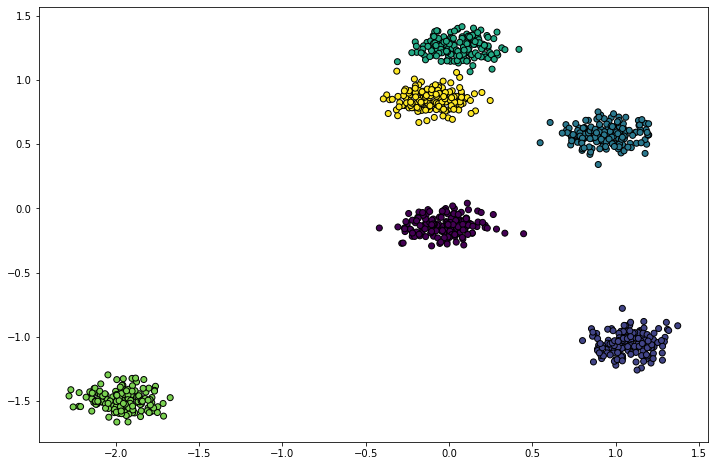

In [24]:
#Set cluster standard deviation
std=0.5

nClustersTrue = 6

# Generate sample data
X, labels_true = make_blobs(n_samples=1000, centers=nClustersTrue, cluster_std=std,random_state=18)
X = StandardScaler().fit_transform(X)

fig = plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],edgecolor='0',c=labels_true)
plt.show()

Run K-Means
---

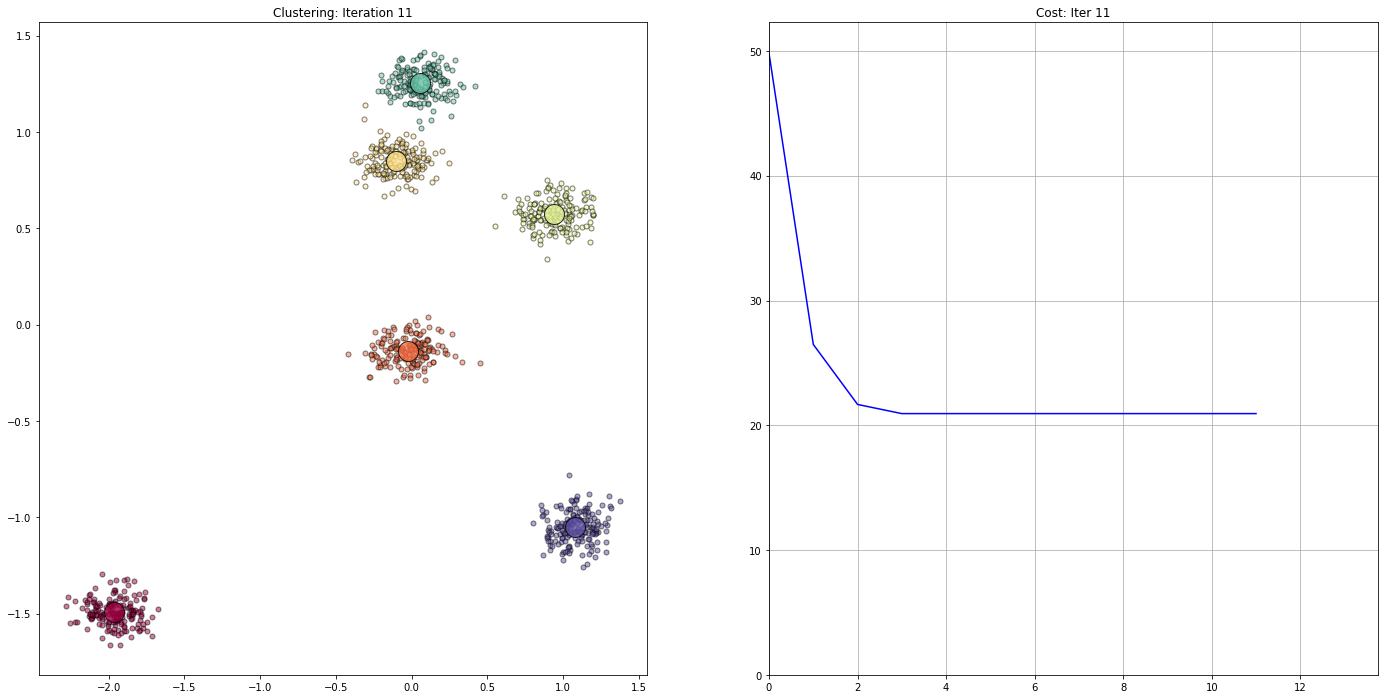

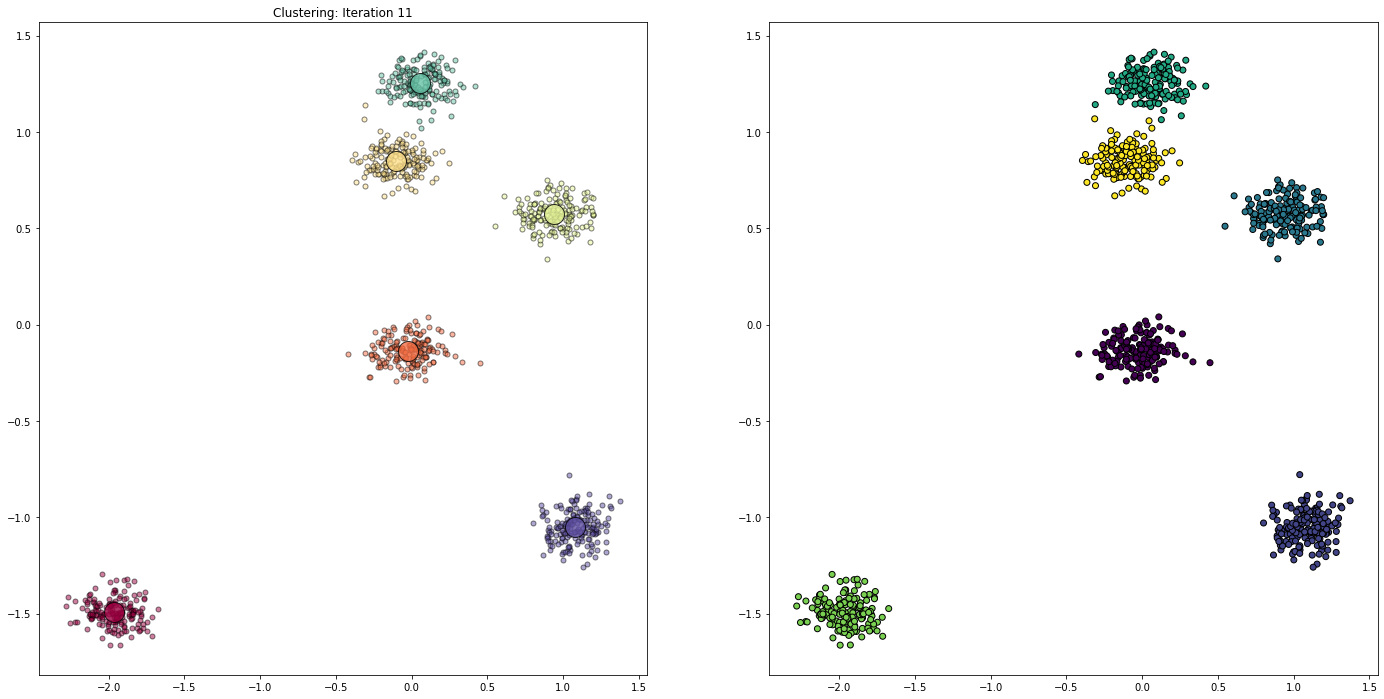

In [33]:
n_clusters=nClustersTrue #Set Number of Clusters
L=100 # Number of learning steps
cost = np.zeros(L) #Custering cost

#Randomly Initialize the Clusters
centers = 2.5*(np.random.rand(n_clusters, 2)-0.5)

# The k-Means algorithm needs to be given:
# - The number of clusters you want to make
# - The number of initializations you want to average over (n_init)
# - The maximum number of iterations to run (max_iter)
# - Initial cluster positions (init)
# Here we are using just one iteration at a time, so that you can watch
# the clustering like a movie.  If you use the defaults, all you need
# to provide is the number of clusters.
km = KMeans(n_clusters=n_clusters, n_init=1,init=centers,max_iter=1).fit(X)

for i in range(L):

    labels = km.predict(X)
    centers = km.cluster_centers_
    cost[i] = km.inertia_
    
    # run one iterative step at a time so we can show the progress
    km = KMeans(n_clusters=n_clusters, n_init=1,init=centers,max_iter=1).fit(X)
    
    clear_output(wait=True)
    plt.figure(101,figsize=(24,12))
    plt.subplot(1,2,1)
    plot_clusters(labels, centers, X,i)
      
    plt.subplot(1,2,2)
    plt.plot(cost[:i+1],'b-')
    plt.xlim(0,i*1.25)
    plt.ylim(0,1.05*max(cost[:i+1]))
    plt.title("Cost: Iter %d"%(i))
    plt.grid(True)
    
    plt.show()   
    if(i>10):
        if(np.abs(cost[i-1]-cost[i])<1e-6): break

# Plot the final clusters next to the truth labels to see how we did 
plt.figure(101,figsize=(24,12))
plt.subplot(1,2,1)
plot_clusters(labels, km.cluster_centers_, X,i)
      
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=labels_true,edgecolor='0')
plt.show()

***
***
# Make an elbow plot!

An elbow plot expresses a clustering optimization metric that should drop quickly when you have too few clusters and flatten out when you've reached a sufficient number of clusters.  The k-Means algorithm in `scikit-learn` uses an optimization metric called "intertia", which is really just the within-cluster sum of squares:

<p style="text-align: center;">$ I = \sum_{i=0}^n \min_{\mu_j \in C} \left( || x_i - \mu_j||^2\right)$</p>

In our elbow plot, we will also include two other useful clustering metrics:
  * Silhouette Score:  compares the mean distance of an object with other objects in the same cluster vs the objects in the nearest cluster.  Should be small for poor clustering and peak for ideal clustering.
  * Davies-Bouldin Score: This is a measure of scatter within each cluster, which is summed over all clusters formed.  Ideally this is should be small and should form a dip for ideal clustering.
  
By plotting these metrics over a range of cluster hypotheses, we can try to judge what the best clustering result might be.

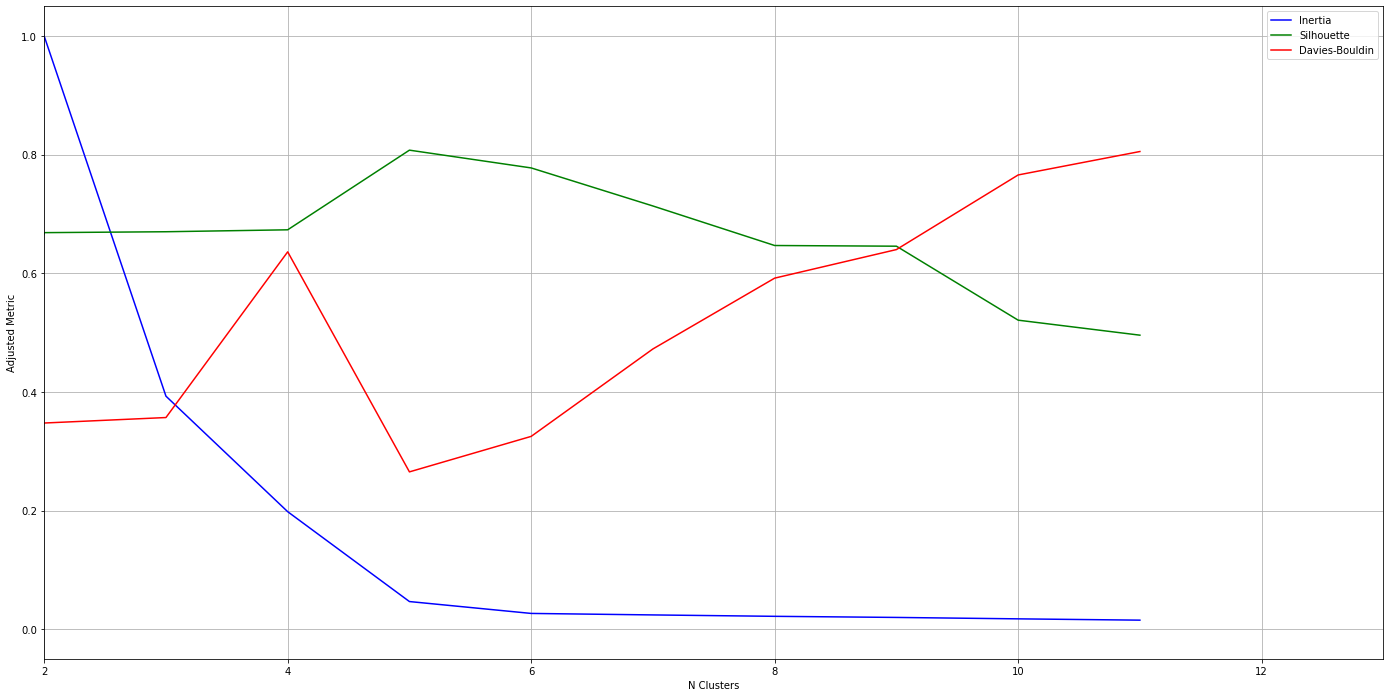

In [36]:
nClust_max = 2*nClustersTrue
cost = np.zeros((nClust_max,3)) #Custering cost

maxInertia = 1
for iclust in range(2,nClust_max):

    #Randomly Initialize the Clusters
    # Default number of averaged iterations is 10
    km = KMeans(n_clusters=iclust).fit(X)
    labels = km.predict(X)
    maxInertia = np.maximum(maxInertia,km.inertia_)
    cost[iclust,0] = km.inertia_/maxInertia #normalize to max=1 so that we can be on the same plot
    cost[iclust,1] = metrics.silhouette_score(X,labels) #larger is better!
    cost[iclust,2] = metrics.davies_bouldin_score(X,labels) #lower is better!

    if True:
        clear_output(wait=True)
        plt.figure(101,figsize=(24,12))
        plt.plot(cost[:,0],'b-',label = 'Inertia')
        plt.plot(cost[:,1],'g-',label = 'Silhouette')
        plt.plot(cost[:,2],'r-',label = 'Davies-Bouldin')
        plt.xlim(2,iclust+2)
        plt.xlabel("N Clusters")
        plt.ylabel("Adjusted Metric")
        plt.legend()
        plt.grid(True)
    
        plt.show()   